# Pandas - Data Analysis with Python
(last update 11/10/23)

Pandas is a high-performance, easy-to-use data structures and data analysis tools.

<img src="images/pandas.jpg" style="width: 500px;"/>

**There is abundance of data and we should/need to make sense of it**
- Smart devices, Strava, ...
- [SSB](https://data.ssb.no/api/) Statistics Norway *
- [EuroStat](https://ec.europa.eu/eurostat/web/population-demography/demography-population-stock-balance/database) Statistics Europe *
- [Kaggle](https://www.kaggle.com/datasets/) Data Science compatitions*
- [Quandl](https://www.quandl.com/) for finances
- [Yr](http://om.yr.no/verdata/free-weather-data/)
- [Oslo Bysykkel API](https://developer.oslobysykkel.no) **

(We will work with these ones today in lecture* or exercises**)

## What is Pandas good for?

Working with (large) data sets and created automated data processes.

Pandas is extensively used to prepare data in data science (machine learning, data analytics, ...)

Examples:
- Import and export data into standard formats (CSV, Excel, Latex, ..).
- Combine with Numpy for advanced computations or Matplotlib for visualisations.
- Calculate statistics and answer questions about the data, like
- What's the average, median, max, or min of each column?
  - Does column A correlate with column B?
  - What does the distribution of data in column C look like?
- Clean up data (e.g. fill out missing information and fix inconsistent formatting) and merge multiple data sets into one common one

## More information

* Official Pandas documentation: http://pandas.pydata.org/pandas-docs/stable/tutorials.html 
* Pandas cookbook: http://pandas.pydata.org/pandas-docs/stable/cookbook.html
* Wes McKinney, Python for Data Analysis 
![Python for Data Analysis](images/python_for_data_analysis.gif "Python for Data Analysis")
* [Python Data Science Handbook](https://github.com/jakevdp/PythonDataScienceHandbook) by Jake VanderPlas *(We follow Chapter 4 in this lecture)*
<img src="./images/PDSH-cover.png" style="width: 200px;"/>

## This lecture
- Part1 Introduction to Pandas
- Part2 Hands on examples with real data

## Installation

- If you have Anaconda: Already installed
- If you have Miniconda: 
      `conda install pandas`
- If you have your another Python distribution: 
      `python3 -m pip install pandas`

Let's dive in

In [1]:
import pandas as pd

## Pandas `Series` object
`Series` is 1d series of data similar to `numpy.array`.

In [2]:
series = pd.Series([4, 5, 6, 7, 8])
series.values

array([4, 5, 6, 7, 8])

In [3]:
series.index

RangeIndex(start=0, stop=5, step=1)

In [4]:
(series.values.dtype, series.index.dtype)

(dtype('int64'), dtype('int64'))

We see that `series` are indexed and both `values` and `index` are typed. As we saw with numpy this has performance benefits. The similarity with `numpy.array`

In [5]:
series[0]

4

In [6]:
import numpy as np

np.power(series, 2)

0    16
1    25
2    36
3    49
4    64
dtype: int64

However, the indices do not need to be numbers (and neither need to be the values)

In [7]:
values = list(range(65, 75))
index = [chr(v) for v in values]
series = pd.Series(values, index=index)
series

A    65
B    66
C    67
D    68
E    69
F    70
G    71
H    72
I    73
J    74
dtype: int64

The `series` than behaves also like a dictionary, although it supports fancy indexing.

In [8]:
series["A"], series["D":"H"]

(65,
 D    68
 E    69
 F    70
 G    71
 H    72
 dtype: int64)

Continuing the analogy with dictionary a possible way to make `series` is from a dictionary

In [9]:
data = {
    "Washington": "United States of America",
    "London": "Great Britain",
    "Oslo": "Norway",
}
series = pd.Series(data)
series

Washington    United States of America
London                   Great Britain
Oslo                            Norway
dtype: object

Note that for values that are amenable to `str` we have the string methods ...

In [10]:
series.str.upper()

Washington    UNITED STATES OF AMERICA
London                   GREAT BRITAIN
Oslo                            NORWAY
dtype: object

... and so we can for example compute a mask using regular expressions (here looking for states with 2 word names) ...

In [11]:
mask = series.str.match(r"^\w+\s+\w+$")
mask

Washington    False
London         True
Oslo          False
dtype: bool

... which can be used to index into the series

In [12]:
series[mask]

London    Great Britain
dtype: object

Some other examples of series indexing

In [13]:
(series[0], series["London":"Oslo"], series[0:2])

('United States of America',
 London    Great Britain
 Oslo             Norway
 dtype: object,
 Washington    United States of America
 London                   Great Britain
 dtype: object)

We can be more explicit about the indexing with indexers `loc` and `iloc`

In [14]:
(series.iloc[0], series.loc["London":"Oslo"], series.iloc[0:2])

('United States of America',
 London    Great Britain
 Oslo             Norway
 dtype: object,
 Washington    United States of America
 London                   Great Britain
 dtype: object)

In [15]:
series[1:3]

London    Great Britain
Oslo             Norway
dtype: object

In [16]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


But why does this matter? Consider

In [17]:
tricky = pd.Series(["a", "b", "c"], index=[7, 5, 4])
tricky

7    a
5    b
4    c
dtype: object

In [18]:
# Let's demonstrate that we can sort
tricky = tricky.sort_index()

In [19]:
tricky

4    c
5    b
7    a
dtype: object

In [20]:
# Here we are refering to the value at row where index = 4 and values where at first though second row!
# Try tricky.loc[4] vs tricky.iloc[4]
(tricky.loc[4], tricky[0:2])

('c',
 4    c
 5    b
 dtype: object)

## Pandas `DataFrame` object
Two dimensional data are represented by `DataFrame`s. Again *Pandas* allows for flexibility of what row/columns indices can be. `DataFrame`s can be constructed in a number of ways

In [21]:
def spreadsheet(nrows, ncols, start=0, cstart=0, base=0):
    data = base + np.random.rand(nrows, ncols)
    index = [f"r{i}" for i in range(start, start + nrows)]
    columns = [f"c{i}" for i in range(cstart, cstart + ncols)]
    # c0 c1 c2
    # r0
    # r1
    return pd.DataFrame(data, index=index, columns=columns)


data_frame = spreadsheet(10, 4)
data_frame['c0']

r0    0.341584
r1    0.154689
r2    0.829218
r3    0.860563
r4    0.482496
r5    0.623338
r6    0.951465
r7    0.330926
r8    0.805647
r9    0.038046
Name: c0, dtype: float64

For large frame it is usefull to look at portions of the data  

In [22]:
data_frame = spreadsheet(10_000, 4)
print(len(data_frame))
data_frame.head(10)  # data_frame.tail is for the end part

10000


,c0,c1,c2,c3
r0,0.658119,0.888360,0.151696,0.680974
r1,0.519551,0.838755,0.180593,0.933276
r2,0.149844,0.110505,0.253935,0.506687
r3,0.582279,0.171603,0.414131,0.822162
r4,0.721373,0.428403,0.404248,0.841991
r5,0.432620,0.953647,0.023574,0.614961
r6,0.939906,0.018228,0.556107,0.012206
r7,0.836547,0.463066,0.802324,0.835970
r8,0.440520,0.777486,0.042400,0.008710
r9,0.165533,0.267046,0.287619,0.101397


We can combines multiple series into a frame

In [23]:
index = ("Min", "Ingeborg", "Miro")
nationality = pd.Series(["USA", "NOR", "SVK"], index=index)
university = pd.Series(["Berkeley", "Bergen", "Oslo"], index=index)

instructors = pd.DataFrame({"nat": nationality, "uni": university})
instructors

,nat,uni
Min,USA,Berkeley
Ingeborg,NOR,Bergen
Miro,SVK,Oslo


In [24]:
(instructors.index, instructors.columns)

(Index(['Min', 'Ingeborg', 'Miro'], dtype='object'),
 Index(['nat', 'uni'], dtype='object'))

Anothor way of creating is using dictionaries

In [25]:
f = pd.DataFrame(
    {
        "country": ["CZE", "NOR", "USA"],
        "capital": ["Prague", "Oslo", "Washington DC"],
        "pop": [5, 10, 300],
    }
)
f

,country,capital,pop
0,CZE,Prague,5
1,NOR,Oslo,10
2,USA,Washington DC,300


When some column is unique we can designate it as index. Of course, tables can be stored in various formats. We will come back to reading later.

In [26]:
# LaTex
import re

fi = f.set_index("country")

tex_table = fi.style.to_latex()
# To ease the prining
for row in re.split(r"\n", tex_table):
    print(row)

\begin{tabular}{llr}
 & capital & pop \\
country &  &  \\
CZE & Prague & 5 \\
NOR & Oslo & 10 \\
USA & Washington DC & 300 \\
\end{tabular}



In [27]:
# CSV
tex_table = fi.to_csv(sep=";")
# To ease the prining
for row in re.split(r"\n", tex_table):
    print(row)

country;capital;pop
CZE;Prague;5
NOR;Oslo;10
USA;Washington DC;300



Going back to frame creation, recall that above, the two series had a common index. What happens with the frame when this is not the case? Below we also illustrate another constructor.

In [28]:
nationality = {"Miro": "SVK", "Ingeborg": "NOR", "Min": "USA"}
university = {"Miro": "Oslo", "Ingeborg": "Bergen", "Min": "Berkeley", "Joe": "Harvard"}
office = {"Miro": 303, "Ingeborg": 309, "Min": 311, "Joe": -1}
# Construct from list of dictionary using union of keys as columns - we need to fill in values for some
# NOTE: here each dictionary essentially defines a row
missing_data_frame = pd.DataFrame(
    [nationality, university, office], index=["nation", "uni", "office"]
)
missing_data_frame

,Miro,Ingeborg,Min,Joe
nation,SVK,NOR,USA,NaN
uni,Oslo,Bergen,Berkeley,Harvard
office,303,309,311,-1


In [29]:
# Just to make it look better
missing_data_frame = missing_data_frame.T
missing_data_frame

,nation,uni,office
Miro,SVK,Oslo,303
Ingeborg,NOR,Bergen,309
Min,USA,Berkeley,311
Joe,NaN,Harvard,-1


The missing value has been filled with a special value. Real data often suffer from lack of regularity. We can check for this

In [30]:
missing_data_frame.isna()

,nation,uni,office
Miro,False,False,False
Ingeborg,False,False,False
Min,False,False,False
Joe,True,False,False


And the provide a missing value. Note that this can be done already when we are constructing the frame.

In [31]:
missing_data_frame.fillna("OutThere")

,nation,uni,office
Miro,SVK,Oslo,303
Ingeborg,NOR,Bergen,309
Min,USA,Berkeley,311
Joe,OutThere,Harvard,-1


Or discard the data. We can drop the row which has NaN. Note that by default any NaN is enough but we can be more tolerant (see `how` and `thresh` keyword arguments)

In [32]:
missing_data_frame.dropna()

,nation,uni,office
Miro,SVK,Oslo,303
Ingeborg,NOR,Bergen,309
Min,USA,Berkeley,311


Or we drop the problematic column. Axis 0 is row (just like in `numpy`)

In [33]:
missing_data_frame.dropna(axis=1)

,uni,office
Miro,Oslo,303
Ingeborg,Bergen,309
Min,Berkeley,311
Joe,Harvard,-1


Note that the above calls are returning a new `Frame`, ie. are not in in-place. For this use `.dropna(..., inplace=True)`

Once we have the frame we can start computing with it. Let's consider indexing first

In [34]:
missing_data_frame

,nation,uni,office
Miro,SVK,Oslo,303
Ingeborg,NOR,Bergen,309
Min,USA,Berkeley,311
Joe,NaN,Harvard,-1


In [35]:
# Get a specific series
missing_data_frame["nation"]

Miro        SVK
Ingeborg    NOR
Min         USA
Joe         NaN
Name: nation, dtype: object

In [36]:
# Or several as a frame
missing_data_frame[["nation", "uni"]]

,nation,uni
Miro,SVK,Oslo
Ingeborg,NOR,Bergen
Min,USA,Berkeley
Joe,NaN,Harvard


Note that slicing default to rows

In [37]:
# Will fail because no rows names like that
missing_data_frame["nation":"office"]

KeyError: 'nation'

In [38]:
# See that slice goes for rows
missing_data_frame["Miro":"Min"]

,nation,uni,office
Miro,SVK,Oslo,303
Ingeborg,NOR,Bergen,309
Min,USA,Berkeley,311


We can call *indexers* to rescue

In [39]:
missing_data_frame.loc[:, "nation":"uni"]

,nation,uni
Miro,SVK,Oslo
Ingeborg,NOR,Bergen
Min,USA,Berkeley
Joe,NaN,Harvard


Indexes can of course be more involed

In [40]:
missing_data_frame["office"] > 305

Miro        False
Ingeborg     True
Min          True
Joe         False
Name: office, dtype: bool

In [41]:
missing_data_frame.loc[missing_data_frame["office"] > 305, ["uni", "nation"]]

,uni,nation
Ingeborg,Bergen,NOR
Min,Berkeley,USA


Next let's compute with the values in the frames

In [42]:
f0 = spreadsheet(4, 4)
np.cos(f0)

,c0,c1,c2,c3
r0,0.870461,0.789699,0.739024,0.860132
r1,0.785803,0.718719,0.580812,0.584109
r2,0.988713,0.956762,0.956623,0.851564
r3,0.559086,0.889881,0.990609,0.903777


Binary operation will align the frame - operation is valid only for the index-column pairs found in both and with will get missing for the rest

In [43]:
f1 = spreadsheet(5, 6)
f0 + f1

,c0,c1,c2,c3,c4,c5
r0,0.533858,0.997285,1.098653,1.032666,NaN,NaN
r1,1.372231,0.804163,1.445381,1.393992,NaN,NaN
r2,1.056678,0.809150,0.589316,0.936123,NaN,NaN
r3,1.311115,0.863243,0.404915,0.961394,NaN,NaN
r4,NaN,NaN,NaN,NaN,NaN,NaN


Note that this is note unique to frames and works (unsuprisingly on series too)

In [44]:
c00 = f0["c0"]
c10 = f1["c0"]
c00 + c10

r0    0.533858
r1    1.372231
r2    1.056678
r3    1.311115
r4         NaN
Name: c0, dtype: float64

Reduction operators default to be computed for each column

In [45]:
f1.max()

c0    0.906288
c1    0.514013
c2    0.883873
c3    0.519110
c4    0.910645
c5    0.811385
dtype: float64

For column wise reduction we need to specify the axis (`axis=1`)

In [46]:
f1.mean(axis="columns")

r0    0.339750
r1    0.554993
r2    0.498857
r3    0.482604
r4    0.406889
dtype: float64

## Pandas `Index` object

In the previous usecase `f0 + f1` we have seen that operation is performed for _common_ keys - this suggests that we can do logical operations on indices. This is indeed the case

In [47]:
i0 = f0.index
i1 = f1.index
(i0.union(i1), i0.intersection(i1))

(Index(['r0', 'r1', 'r2', 'r3', 'r4'], dtype='object'),
 Index(['r0', 'r1', 'r2', 'r3'], dtype='object'))

Indexes can be explicitely constructed. For working with time series it is useful to index by time. Let's get timestamp indexing 
for every **D**ay between 2 dates

In [48]:
import datetime

time = pd.date_range(
    start=datetime.date.fromisoformat("2022-10-19"),
    end=datetime.date.fromisoformat("2022-12-20"),
    freq="D",
)
time

DatetimeIndex(['2022-10-19', '2022-10-20', '2022-10-21', '2022-10-22',
               '2022-10-23', '2022-10-24', '2022-10-25', '2022-10-26',
               '2022-10-27', '2022-10-28', '2022-10-29', '2022-10-30',
               '2022-10-31', '2022-11-01', '2022-11-02', '2022-11-03',
               '2022-11-04', '2022-11-05', '2022-11-06', '2022-11-07',
               '2022-11-08', '2022-11-09', '2022-11-10', '2022-11-11',
               '2022-11-12', '2022-11-13', '2022-11-14', '2022-11-15',
               '2022-11-16', '2022-11-17', '2022-11-18', '2022-11-19',
               '2022-11-20', '2022-11-21', '2022-11-22', '2022-11-23',
               '2022-11-24', '2022-11-25', '2022-11-26', '2022-11-27',
               '2022-11-28', '2022-11-29', '2022-11-30', '2022-12-01',
               '2022-12-02', '2022-12-03', '2022-12-04', '2022-12-05',
               '2022-12-06', '2022-12-07', '2022-12-08', '2022-12-09',
               '2022-12-10', '2022-12-11', '2022-12-12', '2022-12-13',
      

We generate the corresponding data and illustrate some plotting capabilities of `Pandas`

<AxesSubplot: >

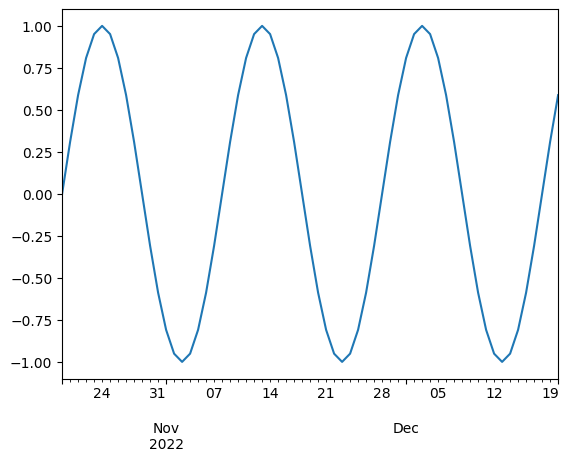

In [49]:
import matplotlib.pyplot as plt

values = np.sin(np.pi / 10 * np.arange(len(time)))

time_series = pd.Series(values, index=time)
time_series.plot()

Note that we are getting the nice xlabels for free!

Time indexing allows us to do some fancy opearations. For example we can have a look at the signal for only the first day of the week (Monday?). For other functionality see `resample`, 'rolling' means on `windows` ets.

<AxesSubplot: >

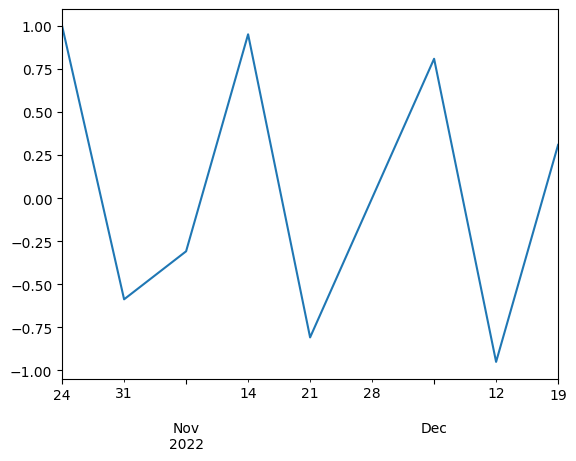

In [50]:
time_series[time.weekday == 0].plot()

Note the value of difference between to time indices

In [51]:
time[:4] - time[1:5]

TimedeltaIndex(['-1 days', '-1 days', '-1 days', '-1 days'], dtype='timedelta64[ns]', freq=None)

The `Timedelta` object can be useful for shifting

In [52]:
diff = pd.Timedelta("1m")
time = time + diff
time[:5]

DatetimeIndex(['2022-10-19 00:01:00', '2022-10-20 00:01:00',
               '2022-10-21 00:01:00', '2022-10-22 00:01:00',
               '2022-10-23 00:01:00'],
              dtype='datetime64[ns]', freq='D')

Time stamps often come in different format. Pandas offers convenience functions for their conversion/parsing.

In [53]:
df = pd.DataFrame({'date': [1470195805, 1480195805, 1490195805],  
                   'value': [2, 3, 4]})
df

,date,value
0,1470195805,2
1,1480195805,3
2,1490195805,4


When was the clock started?

In [54]:
pd.to_datetime(df['date'], unit='s')

0   2016-08-03 03:43:25
1   2016-11-26 21:30:05
2   2017-03-22 15:16:45
Name: date, dtype: datetime64[ns]

In [55]:
import time

pd.to_datetime(pd.Series([0, time.time()]), unit='s')

0   1970-01-01 00:00:00.000000000
1   2023-10-12 07:10:21.943605760
dtype: datetime64[ns]

__Question__: how can we get the years prior to 1970 to work?

### Hierarchical indexing with MultiIndex

Multiindexing is a way to handle higher order tensors, e.g. f(x, y, color). It also allows for organizing the data by establishing hierarchy in indexing. Suppose we have RGB image of 5 x 4 pixels. We could represent this as a table 
with channel x and y coordinate columns and 5 x 4 x 3 rows. A representation more true to the nature of the data would be to have a "column" for each color

In [56]:
column_index = pd.MultiIndex.from_product(
    [["R", "G", "B"], [0, 1, 2, 3]], names=("color", "cindex")
)
column_index

MultiIndex([('R', 0),
            ('R', 1),
            ('R', 2),
            ('R', 3),
            ('G', 0),
            ('G', 1),
            ('G', 2),
            ('G', 3),
            ('B', 0),
            ('B', 1),
            ('B', 2),
            ('B', 3)],
           names=['color', 'cindex'])

In [57]:
image = pd.DataFrame(
    np.arange(60).reshape(5, 12),
    index=pd.Index([0, 1, 2, 3, 4], name="rindex"),
    columns=column_index,
)
image

color    R               G               B            
cindex   0   1   2   3   0   1   2   3   0   1   2   3
rindex                                                
0        0   1   2   3   4   5   6   7   8   9  10  11
1       12  13  14  15  16  17  18  19  20  21  22  23
2       24  25  26  27  28  29  30  31  32  33  34  35
3       36  37  38  39  40  41  42  43  44  45  46  47
4       48  49  50  51  52  53  54  55  56  57  58  59

We can have a look at the said "flat" representation of the data

In [58]:
image.unstack()

color  cindex  rindex
R      0       0          0
               1         12
               2         24
               3         36
               4         48
       1       0          1
               1         13
               2         25
               3         37
               4         49
       2       0          2
               1         14
               2         26
               3         38
               4         50
       3       0          3
               1         15
               2         27
               3         39
               4         51
G      0       0          4
               1         16
               2         28
               3         40
               4         52
       1       0          5
               1         17
               2         29
               3         41
               4         53
       2       0          6
               1         18
               2         30
               3         42
               4         5

Accessing the entries works as follows

In [59]:
image["R"]  # Column(s) where first multiindex is R
image.loc[:, ("R", 0)]  # Column multiindex by R, 0
image.loc[2, ("R", 1)]  # The entry

25

We can perform reduction operation

In [60]:
image.mean().mean()

29.5

## Combining datasets - appending

Extend `numpy.concatenate` to `pandas` objects. We can combine data from 2 frames if they have some "axes" in common. Let's start with 2 identical columns and do default vertical/row wise concatenation. Note that all the operations below create new `DataFrame`

In [61]:
# Unique row indices
d1 = spreadsheet(2, 2, base=0)
d2 = spreadsheet(4, 2, base=10)
print(d1)
print(d2)

          c0        c1
r0  0.904955  0.461721
r1  0.728287  0.227259
           c0         c1
r0  10.784765  10.696760
r1  10.949264  10.610865
r2  10.835922  10.139623
r3  10.458615  10.799789


In [62]:
pd.concat([d1, d2])

,c0,c1
r0,0.904955,0.461721
r1,0.728287,0.227259
r0,10.784765,10.696760
r1,10.949264,10.610865
r2,10.835922,10.139623
r3,10.458615,10.799789


What if there are duplicate indices?

In [63]:
d1 = spreadsheet(2, 2, base=0)  # Has r0, r1
d2 = spreadsheet(2, 2, base=10)  # Has r0, r1
print(d1)
print(d2)
d12 = pd.concat([d1, d2])
d12

          c0        c1
r0  0.887823  0.685323
r1  0.952741  0.543635
           c0         c1
r0  10.876731  10.797502
r1  10.161474  10.832729


,c0,c1
r0,0.887823,0.685323
r1,0.952741,0.543635
r0,10.876731,10.797502
r1,10.161474,10.832729


We can still get values but this lack of uniqueness might not be desirable and we might want to check for it...

In [64]:
d12.loc["r0", :]

,c0,c1
r0,0.887823,0.685323
r0,10.876731,10.797502


In [65]:
pd.concat([d1, d2], verify_integrity=False)  # True

,c0,c1
r0,0.887823,0.685323
r1,0.952741,0.543635
r0,10.876731,10.797502
r1,10.161474,10.832729


... or reset the index. 

In [66]:
pd.concat([d1, d2], ignore_index=True)

,c0,c1
0,0.887823,0.685323
1,0.952741,0.543635
2,10.876731,10.797502
3,10.161474,10.832729


A different, more organized option is to introduce multiindex to remember where the data came from

In [67]:
d12 = pd.concat([d1, d2], keys=["D1", "D2"])
d12

c0         c1
D1 r0   0.887823   0.685323
   r1   0.952741   0.543635
D2 r0  10.876731  10.797502
   r1  10.161474  10.832729

In [68]:
d12.loc["D1", :]

,c0,c1
r0,0.887823,0.685323
r1,0.952741,0.543635


For frames sharing row index we can vertical/column wise concatenation

In [69]:
d1 = spreadsheet(2, 3, cstart=0)
d2 = spreadsheet(2, 3, cstart=3, start=5)
print(d1)
print(d2)
pd.concat([d1, d2], axis=1, verify_integrity=True)

          c0        c1        c2
r0  0.022688  0.677420  0.705416
r1  0.877029  0.949243  0.317691
          c3        c4        c5
r5  0.492914  0.206868  0.292487
r6  0.824141  0.039968  0.829352


,c0,c1,c2,c3,c4,c5
r0,0.022688,0.677420,0.705416,NaN,NaN,NaN
r1,0.877029,0.949243,0.317691,NaN,NaN,NaN
r5,NaN,NaN,NaN,0.492914,0.206868,0.292487
r6,NaN,NaN,NaN,0.824141,0.039968,0.829352


In [70]:
d1 = spreadsheet(2, 3, cstart=0)
d2 = spreadsheet(2, 3, cstart=3, start=1)
print(d1)
print(d2)
pd.concat([d1, d2], axis=1, verify_integrity=True)

          c0        c1        c2
r0  0.178587  0.155051  0.513482
r1  0.540436  0.585551  0.965622
          c3        c4        c5
r1  0.782119  0.806388  0.859816
r2  0.574038  0.615266  0.536074


,c0,c1,c2,c3,c4,c5
r0,0.178587,0.155051,0.513482,NaN,NaN,NaN
r1,0.540436,0.585551,0.965622,0.782119,0.806388,0.859816
r2,NaN,NaN,NaN,0.574038,0.615266,0.536074


What if we are appending two tables with slighlty different columns. It makes sense that there would be some missing data

In [71]:
d1 = spreadsheet(2, 2, cstart=0)  # Has c0 c1
d2 = spreadsheet(2, 3, start=0, cstart=1)  # c1 c2 c3
print(d1)
print(d2)
pd.concat([d1, d2], ignore_index=True)

          c0        c1
r0  0.151458  0.059844
r1  0.623653  0.035702
          c1        c2        c3
r0  0.946713  0.906110  0.300365
r1  0.514724  0.687296  0.905855


,c0,c1,c2,c3
0,0.151458,0.059844,NaN,NaN
1,0.623653,0.035702,NaN,NaN
2,NaN,0.946713,0.906110,0.300365
3,NaN,0.514724,0.687296,0.905855


We see that the by default we combine columns from both tables. But we can be more specific using the `join` or `join_axes` keyword arguments

In [72]:
pd.concat([d1, d2], ignore_index=True, join="inner")  # Use the column intersection c1

,c1
0,0.059844
1,0.035702
2,0.946713
3,0.514724


## Combining datasets - use relations to extend the data
For `pd.concant` a typical use case is if we have tables of records (e.g. some logs of [transaction id, card number], [transaction id, amount]) and we want to append them. A different of way of building up/joining data is by `pd.merge`. Consider the following "relational tables". From `nationality` we know that "Min" -> "USA" while at the same time `university` maps "Min" to "Berkeley".

In [73]:
nationality = pd.DataFrame(
    {
        "name": ["Min", "Miro", "Ingeborg", "Aslak"],
        "nation": ["USA", "SVK", "NOR", "NOR"],
    }
)
print(nationality)
university = pd.DataFrame(
    {
        "name": ["Miro", "Ingeborg", "Min", "Aslak"],
        "uni": ["Oslo", "Bergen", "Berkeley", "Oslo"],
    }
)
print(university)

       name nation
0       Min    USA
1      Miro    SVK
2  Ingeborg    NOR
3     Aslak    NOR
       name       uni
0      Miro      Oslo
1  Ingeborg    Bergen
2       Min  Berkeley
3     Aslak      Oslo


Note that the frame are not aligned in their indexes but using `pd.merge` we can still capture the connection between "Min", "Berkely" and "USA"

In [74]:
pd.merge(nationality, university)

,name,nation,uni
0,Min,USA,Berkeley
1,Miro,SVK,Oslo
2,Ingeborg,NOR,Bergen
3,Aslak,NOR,Oslo


Above is an example of 1-1 join. We can go further and infer properties. Let's have a look up for capitals of some states.

In [75]:
capitals = pd.DataFrame(
    {"nation": ["USA", "SVK", "NOR"], "city": ["Washington", "Brasislava", "Oslo"]}
)
capitals

,nation,city
0,USA,Washington
1,SVK,Brasislava
2,NOR,Oslo


Combining `nationality` with `capitals` we can see that "Ingeborg -> NOR -> Oslo" and thus can build a table with cities

In [76]:
pd.merge(nationality, capitals)  

,name,nation,city
0,Min,USA,Washington
1,Miro,SVK,Brasislava
2,Ingeborg,NOR,Oslo
3,Aslak,NOR,Oslo


Above the merge happened `on` unique common columns. Sometimes we want/need to be more explicit about the "relation".

In [77]:
# This table does not have the "nation" column
capitals2 = pd.DataFrame(
    {
        "state": ["USA", "SVK", "NOR"],
        "city": ["Washington", "Brasislava", "Oslo"],
        "count": [4, 5, 6],
    }
)
capitals2

,state,city,count
0,USA,Washington,4
1,SVK,Brasislava,5
2,NOR,Oslo,6


We can specify which columns are to be used to build the relation as follows

In [78]:
# We will have nation and state but they represent the same so drop
pd.merge(nationality, capitals2, left_on="nation", right_on="state").drop(
    "nation", axis="columns"
)

,name,state,city,count
0,Min,USA,Washington,4
1,Miro,SVK,Brasislava,5
2,Ingeborg,NOR,Oslo,6
3,Aslak,NOR,Oslo,6


Indexes for row can also be used to this end. Let's make a new frame which use `state` column as index. 

In [79]:
capitals2

,state,city,count
0,USA,Washington,4
1,SVK,Brasislava,5
2,NOR,Oslo,6


In [80]:
capitals_ri = capitals2.set_index("state")
capitals_ri

,city,count
state,,
USA,Washington,4
SVK,Brasislava,5
NOR,Oslo,6


It's merge can now be done in two ways. The old one ...

In [81]:
pd.merge(nationality, capitals_ri, left_on="nation", right_on="state")

,name,nation,city,count
0,Min,USA,Washington,4
1,Miro,SVK,Brasislava,5
2,Ingeborg,NOR,Oslo,6
3,Aslak,NOR,Oslo,6


... or using row indexing

In [82]:
pd.merge(nationality, capitals_ri, left_on="nation", right_index=True)

,name,nation,city,count
0,Min,USA,Washington,4
1,Miro,SVK,Brasislava,5
2,Ingeborg,NOR,Oslo,6
3,Aslak,NOR,Oslo,6


What should happen if the relation cannot be establised for all the values needed? In the example below, we cannot infer position for all the `names` 
in the `nationality` frame. A sensible default is to perform merge only for those cases where it is well defined.

In [83]:
jobs = pd.DataFrame({"who": ["Ingeborg", "Aslak"], "position": ["researcher", "ceo"]})

pd.merge(nationality, jobs, left_on="name", right_on="who")

,name,nation,who,position
0,Ingeborg,NOR,Ingeborg,researcher
1,Aslak,NOR,Aslak,ceo


However, by specifying the `how` keyword we can proceed with NaN for "outer" all the merged values or those in "left" or "right" frame.

In [84]:
pd.merge(nationality, jobs, left_on="name", right_on="who", how="outer")  # Inner

,name,nation,who,position
0,Min,USA,NaN,NaN
1,Miro,SVK,NaN,NaN
2,Ingeborg,NOR,Ingeborg,researcher
3,Aslak,NOR,Aslak,ceo


Finally, `pd.merge` can yield to duplicate column indices. These are automatically made unique by `suffixes`

In [85]:
pd.merge(jobs, jobs, on="who", suffixes=["_left", "_right"])

,who,position_left,position_right
0,Ingeborg,researcher,researcher
1,Aslak,ceo,ceo


## Data aggregation and transformations

We have previously seen that we can extact information about `min`, `max`, `mean` etc where by default reduction happend for each fixed column. Hierchical indexing was one option to get some structure to what was being reduced. Here we introduce `groupby` which serves this purpose too. 

In [86]:
data = pd.DataFrame(
    {
        "brand": ["tesla", "tesla", "tesla", "vw", "vw", "mercedes"],
        "model": ["S", "3", "X", "tuareg", "passat", "Gclass"],
        "type": ["sedan", "sedan", "suv", "suv", "sedan", "suv"],
        "hp": [32, 43, 54, 102, 30, 50],
    }
)
data

,brand,model,type,hp
0,tesla,S,sedan,32
1,tesla,3,sedan,43
2,tesla,X,suv,54
3,vw,tuareg,suv,102
4,vw,passat,sedan,30
5,mercedes,Gclass,suv,50


Let us begin by "fixing" a table - say we want to capitalize the "brand" data, e.g. mercedes -> Mercedes. Half-way solution could be

In [87]:
data["brand"] = data["brand"].str.upper()
data

,brand,model,type,hp
0,TESLA,S,sedan,32
1,TESLA,3,sedan,43
2,TESLA,X,suv,54
3,VW,tuareg,suv,102
4,VW,passat,sedan,30
5,MERCEDES,Gclass,suv,50


A better way is to use `transform` function to modify *one* series

In [88]:
data["brand"].transform(str.capitalize)

0       Tesla
1       Tesla
2       Tesla
3          Vw
4          Vw
5    Mercedes
Name: brand, dtype: object

Update the table by assignment

In [89]:
data['brand'] = data["brand"].transform(str.capitalize)
data

,brand,model,type,hp
0,Tesla,S,sedan,32
1,Tesla,3,sedan,43
2,Tesla,X,suv,54
3,Vw,tuareg,suv,102
4,Vw,passat,sedan,30
5,Mercedes,Gclass,suv,50


`transform` mapping can be specified not only via functions but also strings (which map to numpy)

In [90]:
data["hp"].transform('sqrt')

0     5.656854
1     6.557439
2     7.348469
3    10.099505
4     5.477226
5     7.071068
Name: hp, dtype: float64

In [91]:
data["hp"].transform(['sqrt', 'cos'])   # Get several series out

,sqrt,cos
0,5.656854,0.834223
1,6.557439,0.555113
2,7.348469,-0.829310
3,10.099505,0.101586
4,5.477226,0.154251
5,7.071068,0.964966


When modifying the frame we can specify which series is specified by which function

In [92]:
data.transform({'hp': 'sqrt', 'type': lambda x: len(x)})

,hp,type
0,5.656854,5
1,6.557439,5
2,7.348469,3
3,10.099505,3
4,5.477226,5
5,7.071068,3


Note that simply passing `len` would not work. Therefore we pass in `lambda` and the transformation is applied element by element. In general, this way of computing will be less performant - Python's for loop vs. (numpy) vectorization

Finally, we look at `apply` of the table. Here we get access to the entire row, i.e. we can compute with multiplire series.

In [93]:
def foo(x):
    x["w"] = x["hp"] * 0.7
    return x


data.apply(foo, axis="columns")  # NOTE: the new column index!

,brand,model,type,hp,w
0,Tesla,S,sedan,32,22.4
1,Tesla,3,sedan,43,30.1
2,Tesla,X,suv,54,37.8
3,Vw,tuareg,suv,102,71.4
4,Vw,passat,sedan,30,21.0
5,Mercedes,Gclass,suv,50,35.0


Now that we are happy with the table we now want to gather information based on `brand`. If we split by `brand` we can think of 3 (as many as unique `brand` values) subtables. Within these subtables we perform further operations/reductions - they values with be combined in the final result. 

In [94]:
g = data.groupby("brand", group_keys=True)
g

Note that we do not get a frame back but instead there is a `DataFrameGroupBy` object. This way we do not compute rightaway which could be expensive. We can verify that it it's behavior is similar to the frame we wanted

In [95]:
g.indices

{'Mercedes': array([5]), 'Tesla': array([0, 1, 2]), 'Vw': array([3, 4])}

The object supports many methods of the `DataFrame` so we can continue "defining" our processing pipiline. For example we can get the column

In [96]:
g["hp"]

And finally force the computation

In [97]:
g["hp"].max()

brand
Mercedes     50
Tesla        54
Vw          102
Name: hp, dtype: int64

More complete description by `describe`

In [98]:
g["hp"].describe()

,count,mean,std,min,25%,50%,75%,max
brand,,,,,,,,
Mercedes,1.0,50.0,NaN,50.0,50.0,50.0,50.0,50.0
Tesla,3.0,43.0,11.000000,32.0,37.5,43.0,48.5,54.0
Vw,2.0,66.0,50.911688,30.0,48.0,66.0,84.0,102.0


We can also use several aggregators at once by `aggregate`

In [99]:
g["hp"].aggregate(["min", "max"])

,min,max
brand,,
Mercedes,50,50
Tesla,32,54
Vw,30,102


### Pivoting
Another way of getting overview of the data is by `pivoting` (somewhat like groupby in multiple "keys").

In [100]:
# View "hp" just as a function of brand where the remaining dimensions are aggregated
data.pivot_table("hp", index="brand", aggfunc="sum")

,hp
brand,
Mercedes,50
Tesla,129
Vw,132


In [101]:
# View "hp" just as a function of brand and type (leaving agg on models). WE have 2 types SUV and SEDAN
data.pivot_table("hp", index="brand", columns=["type"], aggfunc="sum")

type,sedan,suv
brand,,
Mercedes,NaN,50.0
Tesla,75.0,54.0
Vw,30.0,102.0


In [102]:
# Filling in missing data
data.pivot_table("hp", index="brand", columns=["model"], aggfunc="sum")

model,3,Gclass,S,X,passat,tuareg
brand,,,,,,
Mercedes,NaN,50.0,NaN,NaN,NaN,NaN
Tesla,43.0,NaN,32.0,54.0,NaN,NaN
Vw,NaN,NaN,NaN,NaN,30.0,102.0


## Hands on examples

Let's explore some datasets

__1. Used cars__

This dataset is downloaded from [Kaggle](https://www.kaggle.com/datasets/tsaustin/us-used-car-sales-data?resource=download) and statistics on saled cars (ebay?). More precisely, having read the data by built-in 
reader `read_csv` we have

In [103]:
from pathlib import Path

import requests


def download_file(filename, url):
    path = Path(filename)
    if path.exists():
        return path
    print(f"Downloading {path}")
    with requests.get(url, stream=True) as r:
        r.raise_for_status()
        with path.open("wb") as f:
            for chunk in r.iter_content(chunk_size=8192):
                f.write(chunk)
    return path


url = "https://www.kaggle.com/datasets/tsaustin/us-used-car-sales-data/download?datasetVersionNumber=4"
filename = Path("data") / "used_car_sales.csv"
# download_file(filename, url)

data = pd.read_csv(
    "./data/used_car_sales.csv", dtype={"Mileage": int, "pricesold": int}
)
data.columns

Index(['ID', 'pricesold', 'yearsold', 'zipcode', 'Mileage', 'Make', 'Model',
       'Year', 'Trim', 'Engine', 'BodyType', 'NumCylinders', 'DriveType'],
      dtype='object')

In [104]:
data.head(10)

,ID,pricesold,yearsold,zipcode,Mileage,Make,Model,Year,Trim,Engine,BodyType,NumCylinders,DriveType
0,137178,7500,2020,786**,84430,Ford,Mustang,1988,LX,5.0L Gas V8,Sedan,0,RWD
1,96705,15000,2019,81006,0,Replica/Kit Makes,Jaguar Beck Lister,1958,NaN,383 Fuel injected,Convertible,8,RWD
2,119660,8750,2020,33449,55000,Jaguar,XJS,1995,2+2 Cabriolet,4.0L In-Line 6 Cylinder,Convertible,6,RWD
3,80773,11600,2019,07852,97200,Ford,Mustang,1968,Stock,289 cu. in. V8,Coupe,8,RWD
4,64287,44000,2019,07728,40703,Porsche,911,2002,Turbo X-50,3.6L,Coupe,6,AWD
5,132695,950,2020,462**,71300,Mercury,Montclair,1965,NaN,NO ENGINE,Sedan,0,RWD
6,132829,950,2020,105**,71300,Mercury,Montclair,1965,NaN,NaN,Sedan,0,NaN
7,5250,70000,2019,07627,6500,Land Rover,Defender,1997,NaN,4.0 Liter Fuel Injected V8,NaN,0,4WD
8,29023,1330,2019,07043,167000,Honda,Civic,2001,EX,NaN,Coupe,4,FWD
9,80293,25200,2019,33759,15000,Pontiac,GTO,1970,NaN,NaN,NaN,0,NaN


As part of exploring the dataset let's see about the distributiion of the mileage of the cars. We use `cut` to comnpute a "bin" for each item

In [105]:
max_distance = data['Mileage'].max()
# max_distance
mileage_dist = pd.cut(data['Mileage'], bins=np.linspace(0, 1_000_000, 10, endpoint=True))
mileage_dist

0                (0.0, 111111.111]
1                              NaN
2                (0.0, 111111.111]
3                (0.0, 111111.111]
4                (0.0, 111111.111]
                    ...           
122139           (0.0, 111111.111]
122140    (111111.111, 222222.222]
122141           (0.0, 111111.111]
122142    (111111.111, 222222.222]
122143    (111111.111, 222222.222]
Name: Mileage, Length: 122144, dtype: category
Categories (9, interval[float64, right]): [(0.0, 111111.111] < (111111.111, 222222.222] < (222222.222, 333333.333] < (333333.333, 444444.444] ... (555555.556, 666666.667] < (666666.667, 777777.778] < (777777.778, 888888.889] < (888888.889, 1000000.0]]

In [106]:
# Let's see about the distribution
mileage_dist.value_counts()

Mileage
(0.0, 111111.111]           73813
(111111.111, 222222.222]    37788
(222222.222, 333333.333]     4885
(888888.889, 1000000.0]      1112
(333333.333, 444444.444]      404
(444444.444, 555555.556]       73
(555555.556, 666666.667]       58
(666666.667, 777777.778]       52
(777777.778, 888888.889]       41
Name: count, dtype: int64

We can find out which manufacturer sold the most cars, by grouping and then collapsing based on size

In [107]:
data.groupby("Make").size()

Make
1964 International    1
2101                  1
300                   1
AC                    1
AC Cobra              1
                     ..
ponitac               1
rambler               1
renault               1
smart                 1
willy's jeep          1
Length: 464, dtype: int64

In [108]:
# A sanity check
data.groupby("Make").size().sum() == len(data)
# Unpack this
data.groupby("Make").size().sort_values(ascending=False).head(10)

Make
Ford             22027
Chevrolet        21171
Toyota            6676
Mercedes-Benz     6241
Dodge             5899
BMW               5128
Jeep              4543
Cadillac          3657
Volkswagen        3589
Honda             3451
dtype: int64

In [109]:
data["Make"].value_counts().sort_values(ascending=False).head(10)

Make
Ford             22027
Chevrolet        21171
Toyota            6676
Mercedes-Benz     6241
Dodge             5899
BMW               5128
Jeep              4543
Cadillac          3657
Volkswagen        3589
Honda             3451
Name: count, dtype: int64

We might wonder how the price is related to the car attributes. Let's consider it first as a function of milage

__Question__: Are these correlated?

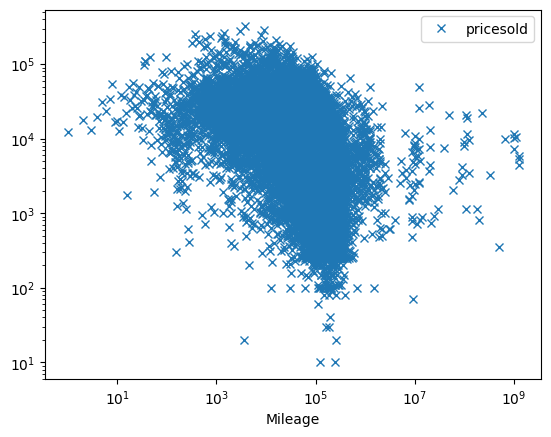

In [110]:
fix, ax = plt.subplots()
# We take the mean in others
data.pivot_table("pricesold", index="Mileage", aggfunc="mean").plot(
    ax=ax, marker="x", linestyle="none"
)
ax.set_xscale("log")
ax.set_yscale("log")

Does it vary with year?

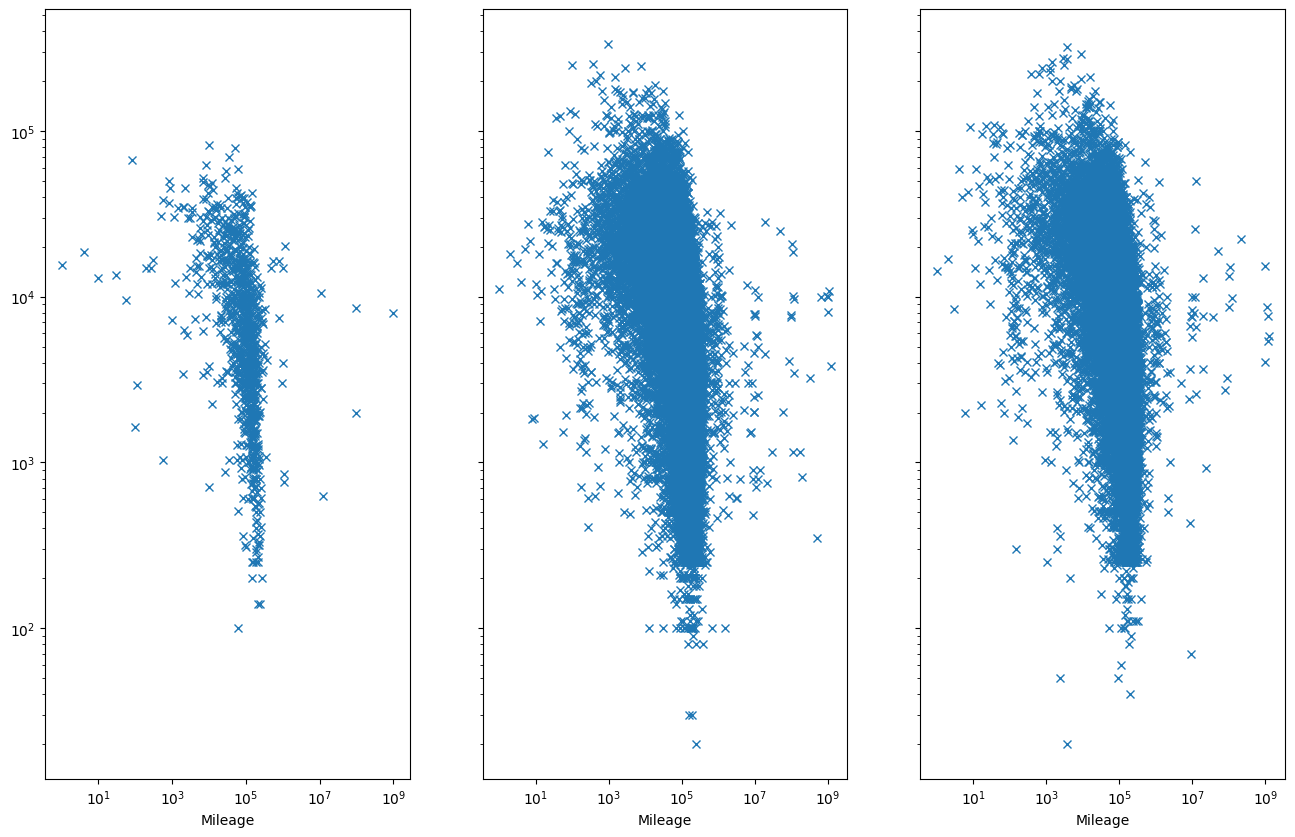

In [111]:
fix, ax = plt.subplots(1, 3, sharey=True, figsize=(16, 10))
# We take the mean in others
tab = data.pivot_table("pricesold", index="Mileage", columns=["yearsold"], aggfunc="mean")
for i, year in enumerate((2018, 2019, 2020)):
    tab[year].plot(ax=ax[i], marker="x", linestyle="none")
    ax[i].set_xscale("log")
    ax[i].set_yscale("log")

At this point we would like to see about the role of the cars age. However, we find out there's something off with the data.

In [112]:
data["Year"].describe()
# We see that we have 92, 0, 20140000

count    1.221440e+05
mean     3.959362e+03
std      1.984514e+05
min      0.000000e+00
25%      1.977000e+03
50%      2.000000e+03
75%      2.008000e+03
max      2.014000e+07
Name: Year, dtype: float64

We show one way of dealing with strangely formated data in the next example. In particular, we will address the problem already when reading the data.

__2. People in Norway by region and age in 2022__

The dateset is obtained from [SSB](https://data.ssb.no/api/v0/dataset/1076?lang=no) and we see that the encoding of the age will present some difficulty for numerics. 

In [113]:
with open("./data/nor_population2022.csv") as f:
    ln = 0
    while ln < 5:
        print(next(f).strip())
        ln += 1

"region";"alder";"ar";"xxx";"count"
"30 Viken";"000 0 ar";"2022";"Personer";12620
"30 Viken";"001 1 ar";"2022";"Personer";12512
"30 Viken";"002 2 ar";"2022";"Personer";13203
"30 Viken";"003 3 ar";"2022";"Personer";13727


Our solution is to specify a converter for the column which uses regexp to get the age string which is converted to integer

In [114]:
import re

# And we also get rid of some redundant data
data = pd.read_csv(
    "./data/nor_population2022.csv",
    delimiter=";",
    converters={"alder": lambda x: int(re.search(r"(\d+) (ar)", x).group(1))},
).drop(["ar", "xxx"], axis="columns")
data

,region,alder,count
0,30 Viken,0,12620
1,30 Viken,1,12512
2,30 Viken,2,13203
3,30 Viken,3,13727
4,30 Viken,4,14003
...,...,...,...
1267,21 Svalbard,101,0
1268,21 Svalbard,102,0
1269,21 Svalbard,103,0
1270,21 Svalbard,104,0


**Question**: Can you now fix the problem with car dataset?

We can have a look at the populaton in different regions

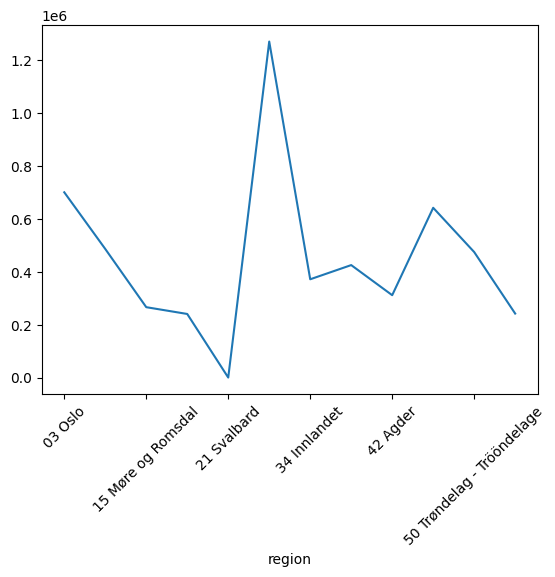

In [115]:
data.groupby("region")["count"].sum().plot()
plt.xticks(rotation=45);

Or breakdown the distribution

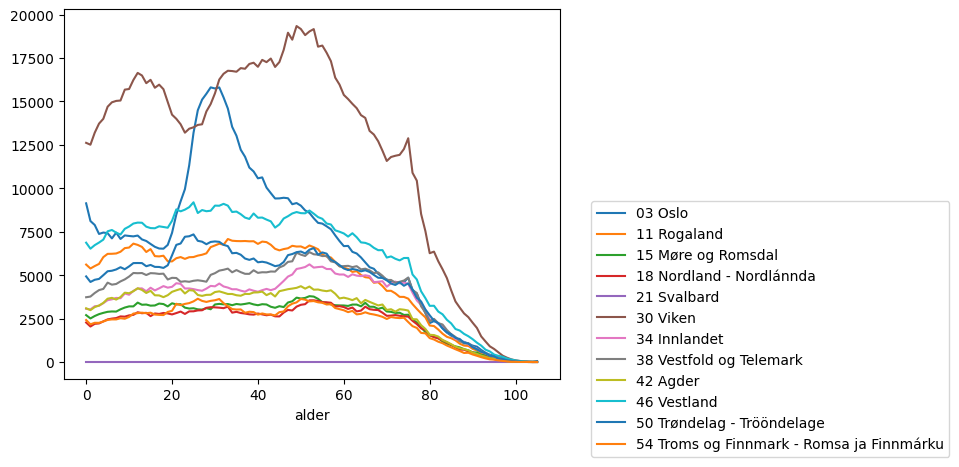

In [116]:
fig, ax = plt.subplots()
data.pivot_table("count", index="alder", columns=["region"]).plot(ax=ax)
ax.legend(bbox_to_anchor=(1.05, 0.5))

__3. Joining__

This example is adopted from * [Python Data Science Handbook](https://github.com/jakevdp/PythonDataScienceHandbook) by Jake VanderPlas. We first download the datasets

In [117]:
for name in "abbrevs", "areas", "population":
    fname = f"state-{name}.csv"
    download_file(
        f"data/{fname}",
        url=f"https://raw.githubusercontent.com/jakevdp/data-USstates/HEAD/{fname}",
    )

You can see that they contain data [full name -> population], [full_name -> area], [abbreviation -> full_name]. Given this we want to order the stated by population density

In [118]:
abbrevs = pd.read_csv("./data/state-abbrevs.csv")
areas = pd.read_csv("./data/state-areas.csv")
pop = pd.read_csv("./data/state-population.csv")
abbrevs.head(10)

,state,abbreviation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA
5,Colorado,CO
6,Connecticut,CT
7,Delaware,DE
8,District of Columbia,DC
9,Florida,FL


In [119]:
(areas.columns, pop.columns, abbrevs.columns)

(Index(['state', 'area (sq. mi)'], dtype='object'),
 Index(['state/region', 'ages', 'year', 'population'], dtype='object'),
 Index(['state', 'abbreviation'], dtype='object'))

We want to build a table which has both areas and population info. To get there population should get abbreviation so that we can look up areas.

In [120]:
merged = pd.merge(
    pop, abbrevs, left_on="state/region", right_on="abbreviation", how="outer"
).drop("abbreviation", axis=1)
merged.head(5)

,state/region,ages,year,population,state
0,AL,under18,2012,1117489.0,Alabama
1,AL,total,2012,4817528.0,Alabama
2,AL,under18,2010,1130966.0,Alabama
3,AL,total,2010,4785570.0,Alabama
4,AL,under18,2011,1125763.0,Alabama


We inspect the integrity of dataset. Something is wrong with `state/region` which is a problem if we want to map further.

In [121]:
merged.isnull().any()

state/region    False
ages            False
year            False
population       True
state            True
dtype: bool

By further inspection the missing data is for "not the usual 50 states" and so we just drop them

In [122]:
merged.loc[merged["state"].isnull(), "state/region"].unique()

array(['PR', 'USA'], dtype=object)

In [123]:
merged.dropna(inplace=True)

We can add to our table (left merge) the areas

In [124]:
final = pd.merge(merged, areas, on="state") 
final.head(5)

,state/region,ages,year,population,state,area (sq. mi)
0,AL,under18,2012,1117489.0,Alabama,52423
1,AL,total,2012,4817528.0,Alabama,52423
2,AL,under18,2010,1130966.0,Alabama,52423
3,AL,total,2010,4785570.0,Alabama,52423
4,AL,under18,2011,1125763.0,Alabama,52423


We use `query` (SQL like) language to get the right rows

In [125]:
table = final.query(
    "year == 2012 & ages == 'total'"
)  # final['population']/final['area (sq. mi)']
table.head(10)

,state/region,ages,year,population,state,area (sq. mi)
1,AL,total,2012,4817528.0,Alabama,52423
95,AK,total,2012,730307.0,Alaska,656425
97,AZ,total,2012,6551149.0,Arizona,114006
191,AR,total,2012,2949828.0,Arkansas,53182
193,CA,total,2012,37999878.0,California,163707
287,CO,total,2012,5189458.0,Colorado,104100
289,CT,total,2012,3591765.0,Connecticut,5544
383,DE,total,2012,917053.0,Delaware,1954
385,DC,total,2012,633427.0,District of Columbia,68
479,FL,total,2012,19320749.0,Florida,65758


We will use the states to index into the column. By index preservation this will give us states to density

In [126]:
table.set_index("state", inplace=True)
density = table["population"] / table["area (sq. mi)"]
density.head(5)

state
Alabama        91.897221
Alaska          1.112552
Arizona        57.463195
Arkansas       55.466662
California    232.121278
dtype: float64

In [127]:
density.sort_values(ascending=False).head(10)

state
District of Columbia    9315.102941
New Jersey              1016.710502
Rhode Island             679.808414
Connecticut              647.865260
Massachusetts            629.588157
Maryland                 474.318369
Delaware                 469.320880
New York                 359.359798
Florida                  293.815946
Pennsylvania             277.139151
dtype: float64

__Question__: Similar data can be obtained from [Eurostat](https://ec.europa.eu/eurostat/web/population-demography/demography-population-stock-balance/database). The new thing is that the format `.tsv`. Let's start parsing the population data

In [128]:
with open("./data/eustat_population.tsv") as f:
    ln = 0
    while ln < 10:
        print(next(f).strip())
        ln += 1

unit,age,sex,geo\time	2010 	2011 	2012 	2013 	2014 	2015 	2016 	2017 	2018 	2019 	2020 	2021
NR,TOTAL,T,AL01	: 	: 	: 	: 	: 	: 	848059 	826904 	819793 	813758 	804689 	797955
NR,TOTAL,T,AL02	: 	: 	: 	: 	: 	: 	1110562 	1146183 	1162544 	1170142 	1176240 	1178435
NR,TOTAL,T,AL03	: 	: 	: 	: 	: 	: 	927405 	903504 	887987 	878527 	865026 	853351
NR,TOTAL,T,ALXX	: 	: 	: 	: 	: 	: 	: 	: 	0 	0 	: 	:
NR,TOTAL,T,AT11	283697 	284581 	285782 	286691 	287416 	288356 	291011 	291942 	292675 	293433 	294436 	296010
NR,TOTAL,T,AT12	1605897 	1609474 	1614455 	1618592 	1625485 	1636778 	1653691 	1665753 	1670668 	1677542 	1684287 	1690879
NR,TOTAL,T,AT13	1689995 	1702855 	1717084 	1741246 	1766746 	1797337 	1840226 	1867582 	1888776 	1897491 	1911191 	1920949
NR,TOTAL,T,AT21	557998 	556718 	556027 	555473 	555881 	557641 	560482 	561077 	560898 	560939 	561293 	562089
NR,TOTAL,T,AT22	1205045 	1206611 	1208696 	1210971 	1215246 	1221570 	1232012 	1237298 	1240214 	1243052 	1246395 	1247077


We see that the countries are subdivided. Let's figure out the reader to help here

In [129]:
d = pd.read_csv(
    "./data/eustat_population.tsv",
    sep="\t",
    converters={0: lambda x: re.search(r"([A-Z]{2})(\w\w)$", x).group(1)},
)
d

,"unit,age,sex,geo\time",2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,AL,:,:,:,:,:,:,848059,826904,819793,813758,804689,797955
1,AL,:,:,:,:,:,:,1110562,1146183,1162544,1170142,1176240,1178435
2,AL,:,:,:,:,:,:,927405,903504,887987,878527,865026,853351
3,AL,:,:,:,:,:,:,:,:,0,0,:,:
4,AT,283697,284581,285782,286691,287416,288356,291011,291942,292675,293433,294436,296010
...,...,...,...,...,...,...,...,...,...,...,...,...,...
337,UK,463388,465794,466605,466737,467326,467889,468903,469420,470743,470990,:,:
338,UK,:,:,1915517,1924614,1933992,1946564,1961928,1976392,1988307,1998699,:,:
339,UK,:,:,1499887,1500987,1504303,1510438,1520628,1531216,1536415,1541998,:,:
340,UK,:,:,946492,945666,944842,944507,945233,946372,946837,947186,:,:


The next challenge is to handle the missing values which do not show with `d.isna()` as all the values are strings and the missing is ": ". How would you solve this issue? 

__4. Timeseries analysis__

Our final examples follows Chapter 4. in PDSH. We will be looking at statics from sensors counting bikers on a bridge. We have 2 counters one for left/right side each.

In [131]:
download_file(
    "data/FremontBridge.csv",
    url="https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD",
)
data = pd.read_csv("data/FremontBridge.csv", index_col="Date", parse_dates=True)
data.head()

/tmp/ipykernel_419026/796841783.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv("data/FremontBridge.csv", index_col="Date", parse_dates=True)


,"Fremont Bridge Sidewalks, south of N 34th St","Fremont Bridge Sidewalks, south of N 34th St Cyclist East Sidewalk","Fremont Bridge Sidewalks, south of N 34th St Cyclist West Sidewalk"
Date,,,
2022-08-01 00:00:00,23.0,7.0,16.0
2022-08-01 01:00:00,12.0,5.0,7.0
2022-08-01 02:00:00,3.0,0.0,3.0
2022-08-01 03:00:00,5.0,2.0,3.0
2022-08-01 04:00:00,10.0,2.0,8.0


In [133]:
len(data)

95640

For the next steps we will only consider the total count of bikers so we simplify the table

In [134]:
data.columns = ["Total", "East", "West"]
data.drop("East", axis="columns", inplace=True)
data.drop("West", axis="columns", inplace=True)
data

,Total
Date,
2022-08-01 00:00:00,23.0
2022-08-01 01:00:00,12.0
2022-08-01 02:00:00,3.0
2022-08-01 03:00:00,5.0
2022-08-01 04:00:00,10.0
...,...
2023-08-31 19:00:00,224.0
2023-08-31 20:00:00,142.0
2023-08-31 21:00:00,67.0


Marking at the data we can definitely see Covid19 but also some seasonal variations

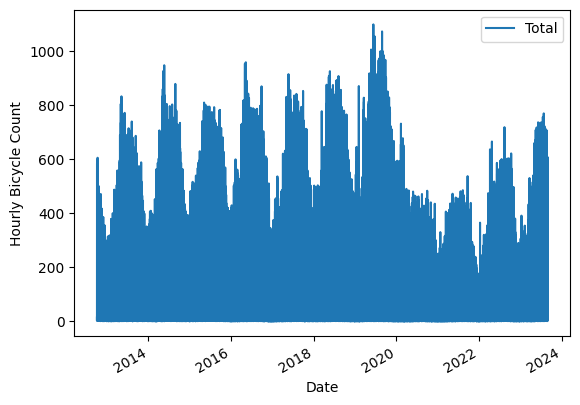

In [135]:
data.plot()
plt.ylabel("Hourly Bicycle Count");  # NOTE: that hour data is for every hour

We can downsample the signal to reveal the variations within year better. Below we downsample to **W**eeks

In [136]:
weekly = data.resample("W").sum()
# Confirmation
weekly.index

DatetimeIndex(['2012-10-07', '2012-10-14', '2012-10-21', '2012-10-28',
               '2012-11-04', '2012-11-11', '2012-11-18', '2012-11-25',
               '2012-12-02', '2012-12-09',
               ...
               '2023-07-02', '2023-07-09', '2023-07-16', '2023-07-23',
               '2023-07-30', '2023-08-06', '2023-08-13', '2023-08-20',
               '2023-08-27', '2023-09-03'],
              dtype='datetime64[ns]', name='Date', length=570, freq='W-SUN')

In [137]:
# And again
weekly.index.isocalendar().week

Date
2012-10-07    40
2012-10-14    41
2012-10-21    42
2012-10-28    43
2012-11-04    44
              ..
2023-08-06    31
2023-08-13    32
2023-08-20    33
2023-08-27    34
2023-09-03    35
Freq: W-SUN, Name: week, Length: 570, dtype: UInt32

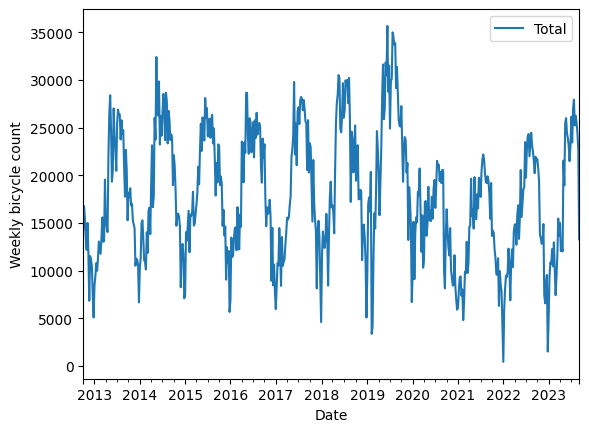

In [138]:
weekly.plot(style=["-"])
plt.ylabel("Weekly bicycle count");

Recall that having time series as index enables many convience functions. For example, we can group/bin data time points by hour and reduce on the subindices giving hous an hourly mean bike usage. It appears to correlate well with rush hours.

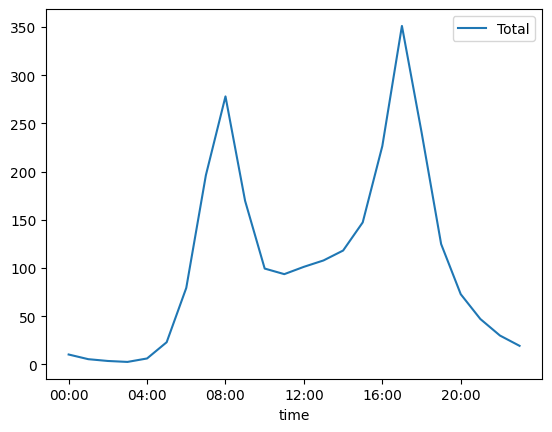

In [139]:
by_time = data.groupby(data.index.time).mean()
hourly_ticks = 4 * 60 * 60 * np.arange(6)  # 3600 * 24, every 4 hour
by_time.plot(xticks=hourly_ticks, style=["-"]);

We can repeat the same exercise, this time breaking up the data by hours to reveal that bikes are probably most used for commuting to work

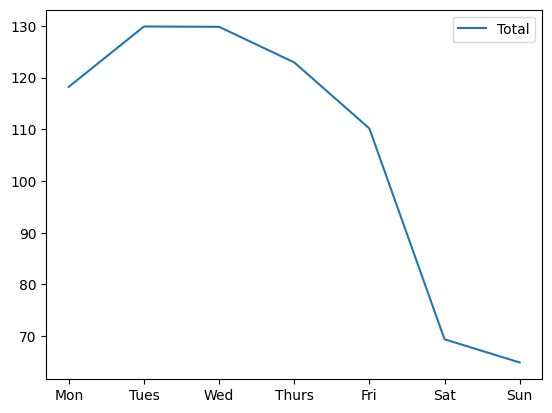

In [140]:
by_weekday = data.groupby(data.index.dayofweek).mean()
by_weekday.index = ["Mon", "Tues", "Wed", "Thurs", "Fri", "Sat", "Sun"]
by_weekday.plot(style=["-"]);

Another look at the same thing using `pivot_table`

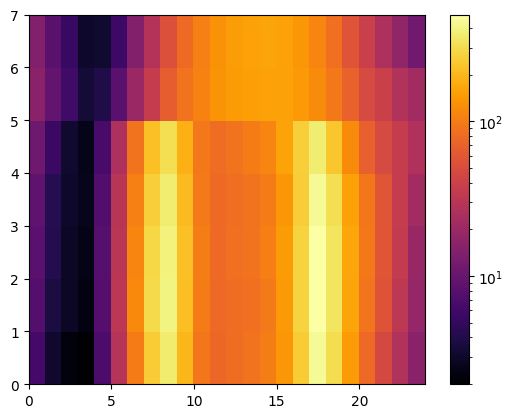

In [141]:
import matplotlib.colors as colors

Z = data.pivot_table(
    "Total", index=data.index.weekday, columns=[data.index.time]
).values

plt.pcolor(Z, norm=colors.LogNorm(vmin=Z.min(), vmax=Z.max()), cmap="inferno")
plt.colorbar()

The heatmap suggests that there are 2 peaks in weekdays and a single one during the weekend. We can varify this by essentially 
collapsing/averaging the plot in the vertical direction separately for the two categories of days. Let's compute the mask for each day in the series

In [142]:
weekend = np.where(data.index.weekday < 5, "Weekday", "Weekend")

Using the mask we can group the data first by the day catogory and then by hours

In [143]:
by_time = data.groupby([weekend, data.index.time]).mean()
by_time.index[:4]

MultiIndex([('Weekday', 00:00:00),
            ('Weekday', 01:00:00),
            ('Weekday', 02:00:00),
            ('Weekday', 03:00:00)],
           )

Finally we have the two collapsed plots

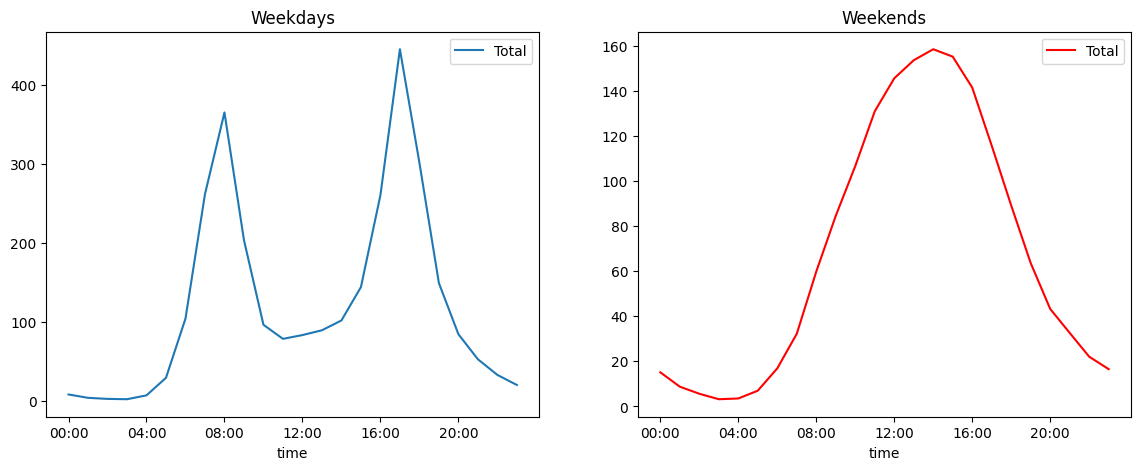

In [144]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(14, 5))
by_time.loc["Weekday"].plot(
    ax=ax[0], title="Weekdays", xticks=hourly_ticks, style=["-"]
)
by_time.loc["Weekend"].plot(
    ax=ax[1], title="Weekends", xticks=hourly_ticks, style=["-"], color="red"
);

__Question__: Head on to [Oslo Bysykkel web](https://oslobysykkel.no/apne-data/historisk) and get the trip data (as CSV). In the last years the students analyzed the trips by distance (see the IN3110 course webpage). What about the distribution of trips by the average speed? Can you use this to infer if the trip was going (on average) uphill or downhill?

In [145]:
bike_csv = "./data/oslo_bike_2022_09.csv"
download_file(
    bike_csv, url="https://data.urbansharing.com/oslobysykkel.no/trips/v1/2022/09.csv"
)

PosixPath('data/oslo_bike_2022_09.csv')

In [146]:
with open(bike_csv) as f:
    print(next(f).strip())
    print(next(f).strip())

started_at,ended_at,duration,start_station_id,start_station_name,start_station_description,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_description,end_station_latitude,end_station_longitude
2022-09-01 03:04:31.178000+00:00,2022-09-01 03:13:01.298000+00:00,510,437,Sentrum Scene,ved Arbeidersamfunnets plass,59.91546786564256,10.751140873016311,583,Galgeberg,langs St. Halvards gate,59.90707579234818,10.779164402446728


At this point we know that time info should be parsed with dates. For duration (in seconds) we will have ints

In [147]:
data = pd.read_csv(
    bike_csv,
    parse_dates=["started_at", "ended_at"],
    dtype={"duration": int},
)
data.head(5)

,started_at,ended_at,duration,start_station_id,start_station_name,start_station_description,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_description,end_station_latitude,end_station_longitude
0,2022-09-01 03:04:31.178000+00:00,2022-09-01 03:13:01.298000+00:00,510,437,Sentrum Scene,ved Arbeidersamfunnets plass,59.915468,10.751141,583,Galgeberg,langs St. Halvards gate,59.907076,10.779164
1,2022-09-01 03:11:09.104000+00:00,2022-09-01 03:14:52.506000+00:00,223,578,Hallings gate,langs Dalsbergstien,59.922777,10.738655,499,Bjerregaards gate,ovenfor Fredrikke Qvams gate,59.925488,10.746058
2,2022-09-01 03:11:37.861000+00:00,2022-09-01 03:23:23.939000+00:00,706,421,Alexander Kiellands Plass,langs Maridalsveien,59.928067,10.751203,390,Saga Kino,langs Olav Vs gate,59.914240,10.732771
3,2022-09-01 03:13:00.843000+00:00,2022-09-01 03:17:17.639000+00:00,256,735,Oslo Hospital,ved trikkestoppet,59.903213,10.767344,465,Bjørvika,under broen Nylandsveien,59.909006,10.756180
4,2022-09-01 03:13:13.330000+00:00,2022-09-01 03:24:15.758000+00:00,662,525,Myraløkka Øst,ved Bentsenbrua,59.937205,10.760581,443,Sjøsiden ved trappen,Oslo S,59.910154,10.751981


What is the station with most departures?

In [148]:
data["start_station_id"].value_counts().sort_values(ascending=False)

start_station_id
421     2133
1755    2079
480     1984
398     1970
551     1918
        ... 
591       84
1919      74
454       72
560       58
573       44
Name: count, Length: 263, dtype: int64

We will approximate the trip distance by measing it as the geodesic between start and end points.

In [149]:
from math import asin, cos, pi, sin, sqrt


def trip_distance(row):
    """As the crow flies"""
    lat_station = row["start_station_latitude"]
    lon_station = row["start_station_longitude"]

    lat_sentrum = row["end_station_latitude"]
    lon_sentrum = row["end_station_longitude"]

    degrees = pi / 180  # convert degrees to radians
    a = (
        0.5
        - (cos((lat_sentrum - lat_station) * degrees) / 2)
        + (
            cos(lat_sentrum * degrees)
            * cos(lat_station * degrees)
            * (1 - cos((lon_station - lon_sentrum) * degrees))
            / 2
        )
    )
    # We have the return value in meters
    return 12742_000 * asin(sqrt(a))  # 2 * R * asin...


distance = data.apply(trip_distance, axis="columns")

In [150]:
duration = data["duration"]
speed = distance / duration

<AxesSubplot: >

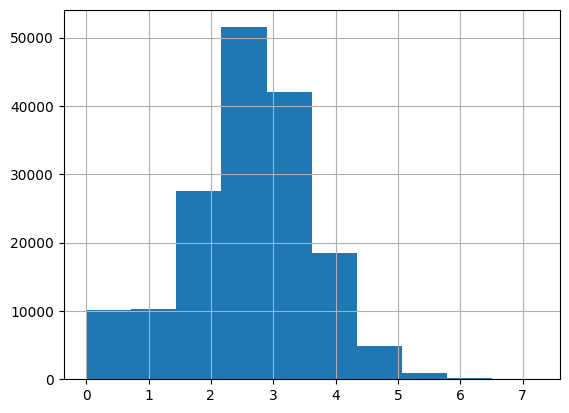

In [151]:
speed.hist()

__Bonus__: Visualization

In [152]:
from ipyleaflet import Circle, Map, Marker, Polyline, basemap_to_tiles, basemaps
from ipywidgets import HTML

trip_csv = "./data/oslo_bike_2022_09.csv"
trips = pd.read_csv(trip_csv)
station_data = trips.groupby(
    [
        "start_station_id",
        "start_station_longitude",
        "start_station_latitude",
        "start_station_name",
    ]
).count()
station_data = station_data.reset_index()
station_data = station_data.drop(columns=station_data.columns[-7:])
station_data = station_data.rename(columns={"started_at": "started_trips"})
station_data = station_data.set_index("start_station_id")
station_data["ended_trips"] = trips["end_station_id"].value_counts()

oslo_center = (
    59.9127,
    10.7461,
)  # NB ipyleaflet uses Lat-Long (i.e. y,x, when specifying coordinates)
oslo_map = Map(center=oslo_center, zoom=13, close_popup_on_click=False)

def add_markers(row):
    center = row["start_station_latitude"], row["start_station_longitude"]
    marker = Marker(
        location=center
    )
    marker2 = Circle(
        location=center, radius=int(0.04 * row["ended_trips"]), color="red"
    )

    message = HTML()
    message.value = f"{row['start_station_name']} <br> Trips started: {row['started_trips']}"
    
    marker.popup = message
    oslo_map.add_layer(marker)
    oslo_map.add_layer(marker2)


station_data.apply(add_markers, axis=1)

start_station_id
377     None
378     None
380     None
381     None
382     None
        ... 
2340    None
2347    None
2349    None
2350    None
2351    None
Length: 263, dtype: object

In [153]:
oslo_map

Map(center=[59.9127, 10.7461], close_popup_on_click=False, controls=(ZoomControl(options=['position', 'zoom_in…